# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

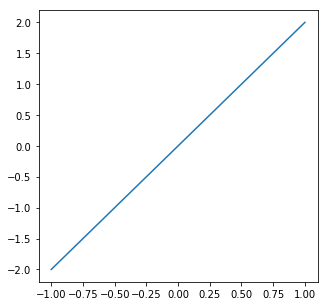

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 5,5

x = np.linspace(-1,1,100)
y = 2*x
plt.plot(x, y)
plt.show()


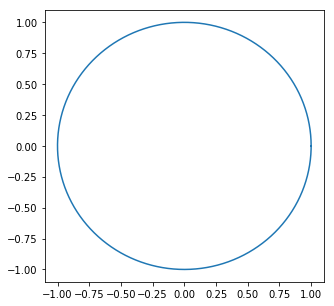

In [49]:
# 0-2pi
theta = np.linspace(0, 2*np.pi, 999)

# Radius
r = 1

#Circle
x1 = r*np.cos(theta)
x2 = r*np.sin(theta)

fig, ax = plt.subplots(1)

ax.plot(x1, x2)
ax.set_aspect
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

Each input(x) should have a single output(y)

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

Only 2 - All the others have at least 2 values of y for a single x

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

domain m = 3, codomain = 3

domain n = 4, codomain = 2

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

Yes. An example would be a function that takes a square for input and outputs a cube.

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix}
\end{align}

In [52]:
def p(x1, x2):
    return np.array([[x1 + 3*x2], 
                     [2*x2 - x1]])

def q(x1, x2, x3):
    return np.array([[4*x1 + x2 + 2*x3],
                     [2*x2 - x1 + 3*x3],
                     [5*x1 - 2*x3 + x2]])


p_trans = np.column_stack((p(1, 0), p(0, 1)))
q_trans = np.column_stack((q(1, 0, 0), q(0, 1, 0), q(0, 0, 1)))

print(p_trans)
print('--')
print(q_trans)

[[ 1  3]
 [-1  2]]
--
[[ 4  1  2]
 [-1  2  3]
 [ 5  1 -2]]


## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [114]:
inp1 = np.array([1,2])
inp2 = np.array([1,2,3])
#function p
print('--')
#dot product on p_trans matrix
print(p(inp1[0],inp1[1]))
print(np.dot(p_trans,input_1))
print('\n')

#works with function q and q_trans matrix as well
print(q(inp2[0],inp2[1],inp2[2]))
print('--')
print(np.dot(q_trans,inp2))


--
[[7]
 [3]]
[4 1]


[[12]
 [12]
 [ 1]]
--
[12 12  1]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvector is a vector that only chage by a scalar multiplication on a linear transformation. The scalar in such transformation is the eigenvalue.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

More dimension space increases the time and complexity of processing exponentially. 


## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

Lecture says,  "some says, '**5:1**' " - This is probably what I'd use in lecture assignments and sprints

Wikipedia says something around **10+:1** - Maybe something worth considering about for some models





https://en.wikipedia.org/wiki/One_in_ten_rule



# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

In [355]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [356]:
#encode speicies to number
spec =  df['species'].copy()
df['species'] = df['species'].apply(lambda x: np.where(df.species.unique()==x)[0][0])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [368]:
# PCA
from numpy import array
from sklearn.decomposition import PCA
pca = PCA(2)
pca.fit(df)
print("Eigenvectors: \n", pca.components_)
print('--\n')
print("Eigenvalues: \n",pca.explained_variance_)

data = pca.transform(df)
print("\n Projected Data: \n", data)


Eigenvectors: 
 [[ 0.33418606 -0.07826103  0.80046289  0.33708273  0.35753221]
 [ 0.68858026  0.68410307 -0.09876295 -0.06819839 -0.2084588 ]]
--

Eigenvalues: 
 [4.83503474 0.25208634]

 Projected Data: 
 [[-2.86550669  0.30278044]
 [-2.89321339 -0.17698715]
 [-3.0557491  -0.16800629]
 [-2.92124902 -0.32502721]
 [-2.9067514   0.30233272]
 [-2.48899988  0.73972719]
 [-2.99106535 -0.11673983]
 [-2.81105291  0.15563581]
 [-3.05248032 -0.58968758]
 [-2.85470148 -0.11163329]
 [-2.70085679  0.63629884]
 [-2.79784383  0.00804347]
 [-2.96034027 -0.23902533]
 [-3.36757216 -0.55368658]
 [-2.83079955  1.14659075]
 [-2.58796715  1.30810539]
 [-2.80918503  0.77923237]
 [-2.83179842  0.2959606 ]
 [-2.41462623  0.8847108 ]
 [-2.77523044  0.49131523]
 [-2.51728591  0.41131533]
 [-2.73369607  0.41608508]
 [-3.36061098  0.0664058 ]
 [-2.5085908   0.11587143]
 [-2.55770496 -0.02158542]
 [-2.69970221 -0.12788171]
 [-2.66359007  0.13211984]
 [-2.7520418   0.36176217]
 [-2.82426199  0.30322816]
 [-2.815610

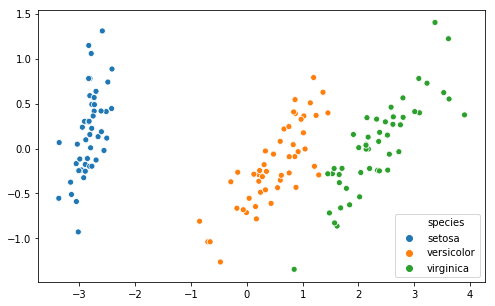

In [369]:
import seaborn as sns
x,y = zip(*data)
mpl.rcParams['figure.figsize'] = 8,5
sns.scatterplot(x,y, spec)
plt.show()

In [371]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig

means = mean(df)
centered_data = df - means

covariance_matrix = cov(centered_data.T)
covariance_matrix

array([[ 0.68569351, -0.03926846,  1.27368233,  0.5169038 ,  0.53087248],
       [-0.03926846,  0.18800403, -0.32171275, -0.11798121, -0.14899329],
       [ 1.27368233, -0.32171275,  3.11317942,  1.29638747,  1.37181208],
       [ 0.5169038 , -0.11798121,  1.29638747,  0.58241432,  0.59798658],
       [ 0.53087248, -0.14899329,  1.37181208,  0.59798658,  0.67114094]])

In [373]:
values, vectors = eig(covariance_matrix)
print(values, vectors)

[4.83503474 0.25208634 0.09589794 0.03668754 0.02072566] [[-0.33418606  0.68858026  0.44123572  0.43143341 -0.18262847]
 [ 0.07826103  0.68410307 -0.61107009 -0.30096245  0.24878332]
 [-0.80046289 -0.09876295  0.14879435 -0.48845415  0.29795609]
 [-0.33708273 -0.06819839 -0.4238525  -0.07214371 -0.83478653]
 [-0.35753221 -0.2084588  -0.47970166  0.69245552  0.34511928]]


In [374]:
#get the projected data by dot product 
data = vectors.T.dot(centered_data.T).T
data

array([[ 2.86550669e+00,  3.02780442e-01, -4.84897211e-02,
         7.67644237e-02,  3.24862994e-02],
       [ 2.89321339e+00, -1.76987146e-01,  1.68798182e-01,
         1.40958967e-01, -5.53796651e-02],
       [ 3.05574910e+00, -1.68006289e-01, -5.65424149e-02,
         4.33252094e-02,  1.10708394e-03],
       [ 2.92124902e+00, -3.25027211e-01, -9.80010810e-03,
        -6.74127158e-02,  5.40828171e-02],
       [ 2.90675140e+00,  3.02332724e-01, -1.53720302e-01,
         3.52483751e-03,  7.56274784e-02],
       [ 2.48899988e+00,  7.39727187e-01, -2.00679240e-01,
        -7.51555196e-02, -3.59394803e-04],
       [ 2.99106535e+00, -1.16739834e-01, -2.50385821e-01,
        -1.16070408e-01,  1.54435504e-02],
       [ 2.81105291e+00,  1.55635814e-01, -1.66268489e-02,
         1.48719131e-02,  5.56664237e-02],
       [ 3.05248032e+00, -5.89687583e-01,  9.28733240e-03,
        -4.46614930e-02,  1.10562390e-02],
       [ 2.85470148e+00, -1.11633294e-01,  1.64955858e-01,
         6.92316784e-02

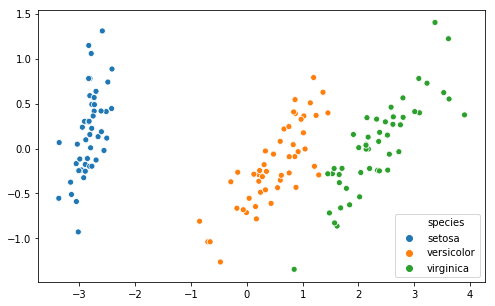

In [380]:
#points = data.T[:2]
points = np.array([(-i[0], i[1]) for i in data]).T #x values are flipped vs the scikitlear PCA
sns.scatterplot(*points, spec)
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)